In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


In [8]:
import pandas as pd

# تحميل جميع الجداول من ملف Excel
file_path = "/content/E-commerce_data.xlsx"

# قراءة البيانات من كل Sheet
customers = pd.read_excel(file_path, sheet_name="customers")
genders = pd.read_excel(file_path, sheet_name="genders")
cities = pd.read_excel(file_path, sheet_name="cities")
transactions = pd.read_excel(file_path, sheet_name="transactions")
branches = pd.read_excel(file_path, sheet_name="branches")
merchants = pd.read_excel(file_path, sheet_name="merchants")


In [9]:
# دمج بيانات
customers = customers.merge(genders, on="gender_id", how="left")
customers = customers.merge(cities, on="city_id", how="left")
branches = branches.merge(merchants, on="merchant_id", how="left")
transactions = transactions.merge(branches, on="branch_id", how="left")


In [10]:
# Calculate features
customer_features = transactions.groupby("customer_id").agg(
    # Count the total number of transactions for each customer
    transaction_count=("transaction_id", "count"),
    # Count the number of unique merchants the customer interacted with
    unique_merchants=("merchant_id", "nunique"),
    # Count the number of unique branches the customer interacted with
    unique_branches=("branch_id", "nunique"),
    # Count the number of "claimed" transactions
    claimed_count=("transaction_status", lambda x: sum(x == "claimed")),
    # Count the number of "burnt" transactions
    burnt_count=("transaction_status", lambda x: sum(x == "burnt"))
).reset_index()


In [11]:
# دمج الميزات مع بيانات العملاء
customers = customers.merge(customer_features, on="customer_id", how="left")


In [12]:
# تحويل الميزات الفئوية إلى قيم رقمية
customers["gender_id"] = customers["gender_id"].astype("category").cat.codes
customers["city_id"] = customers["city_id"].astype("category").cat.codes

# إنشاء نسخة من البيانات لتجنب التحذير
features = customers[["gender_id", "city_id", "transaction_count",
                      "unique_merchants", "unique_branches", "claimed_count", "burnt_count"]].copy()


In [18]:
features.fillna(0, inplace=True)

print(features.describe())

print(features.head())

         gender_id      city_id  transaction_count  unique_merchants  \
count  1000.000000  1000.000000        1000.000000        1000.00000   
mean      0.491000     9.136000           5.000000           3.63500   
std       0.500169     5.895953           2.321937           1.40988   
min       0.000000     0.000000           0.000000           0.00000   
25%       0.000000     4.000000           3.000000           3.00000   
50%       0.000000     9.000000           5.000000           4.00000   
75%       1.000000    14.000000           6.000000           5.00000   
max       1.000000    19.000000          14.000000           8.00000   

       unique_branches  claimed_count  burnt_count  
count      1000.000000         1000.0       1000.0  
mean          3.953000            0.0          0.0  
std           1.580914            0.0          0.0  
min           0.000000            0.0          0.0  
25%           3.000000            0.0          0.0  
50%           4.000000           

In [35]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


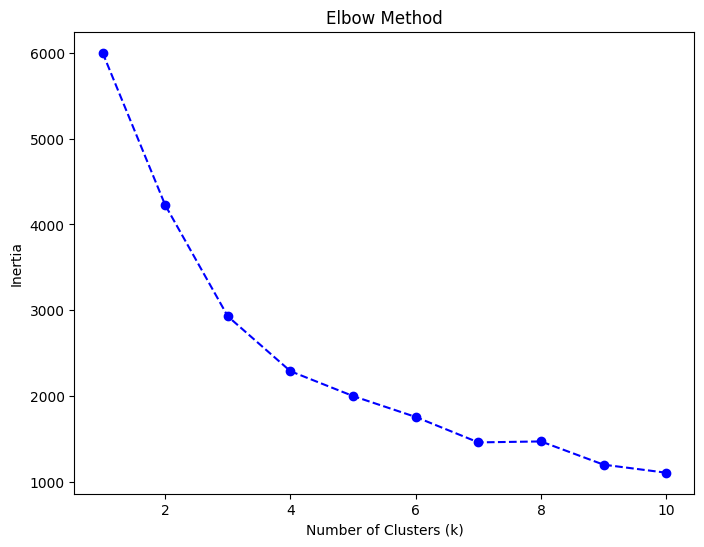

In [36]:
# Elbow Method
inertia = []
k_range = range(1, 11)  # Testing different k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [66]:
# Apply KMeans with K value 4
kmeans = KMeans(n_clusters=4, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)


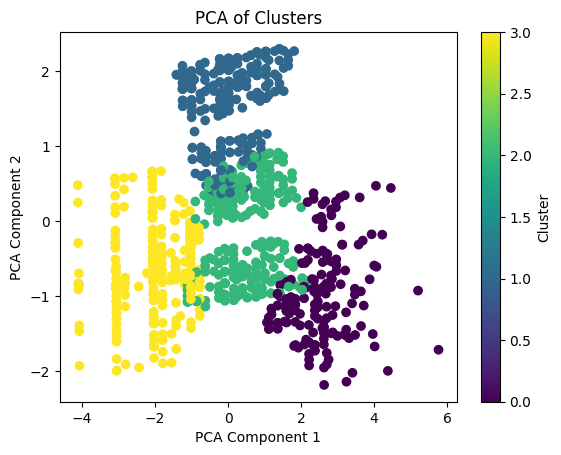

In [67]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [68]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.34


In [63]:
# Apply KMeans with K value 7
kmeans = KMeans(n_clusters=7, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)


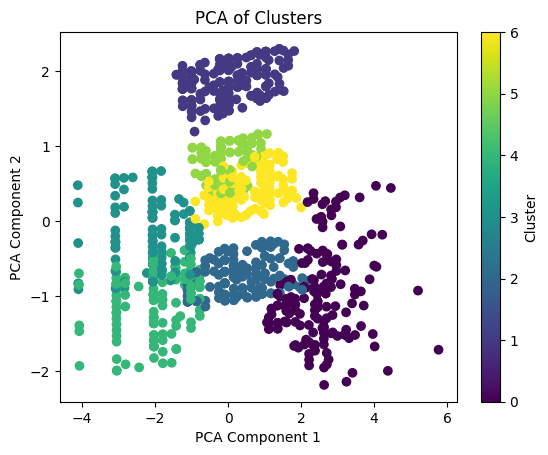

In [64]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [65]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.39


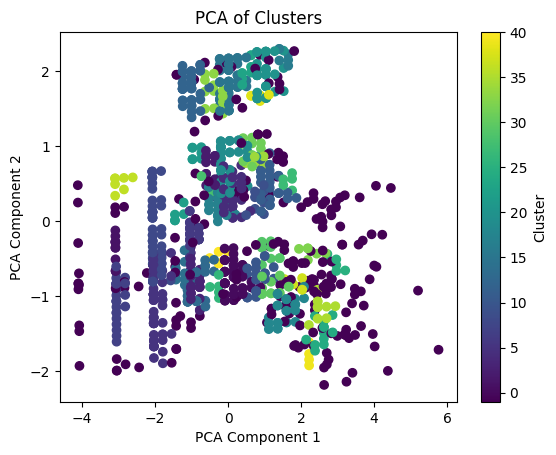

In [71]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
features['cluster'] = dbscan.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

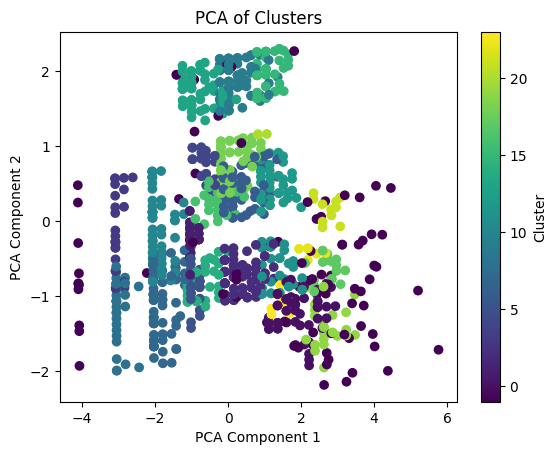

In [72]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)  #try with another value
features['cluster'] = dbscan.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

Number of points classified into clusters: 949
Number of points classified as noise: 51


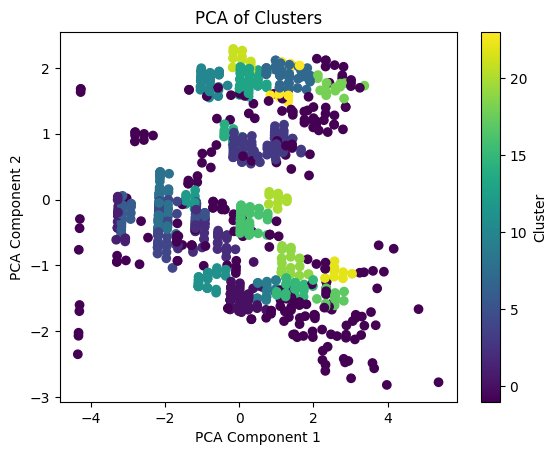

In [79]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  #try with another value
features['cluster'] = dbscan.fit_predict(scaled_features)


print(f"Number of points classified into clusters: {np.sum(features['dbscan_cluster'] != -1)}")
print(f"Number of points classified as noise: {np.sum(features['dbscan_cluster'] == -1)}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

Number of points classified into clusters: 949
Number of points classified as noise: 51


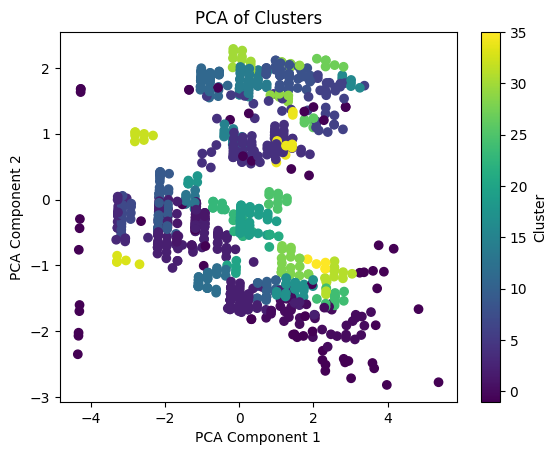

In [81]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)  #try with another value
features['cluster'] = dbscan.fit_predict(scaled_features)


print(f"Number of points classified into clusters: {np.sum(features['dbscan_cluster'] != -1)}")
print(f"Number of points classified as noise: {np.sum(features['dbscan_cluster'] == -1)}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

Number of points classified into clusters: 949
Number of points classified as noise: 51


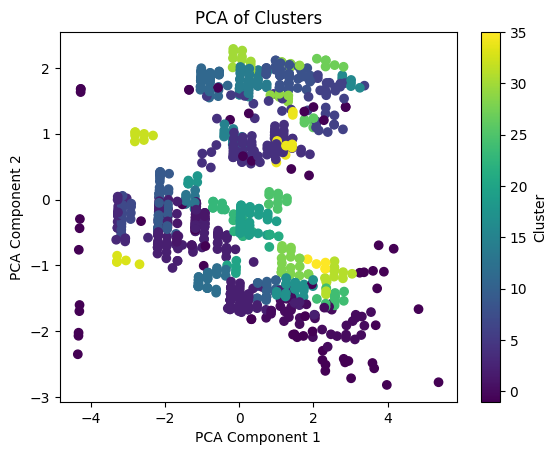

In [87]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.9 ,min_samples=5)  #try with another value
features['cluster'] = dbscan.fit_predict(scaled_features)


print(f"Number of points classified into clusters: {np.sum(features['dbscan_cluster'] != -1)}")
print(f"Number of points classified as noise: {np.sum(features['dbscan_cluster'] == -1)}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

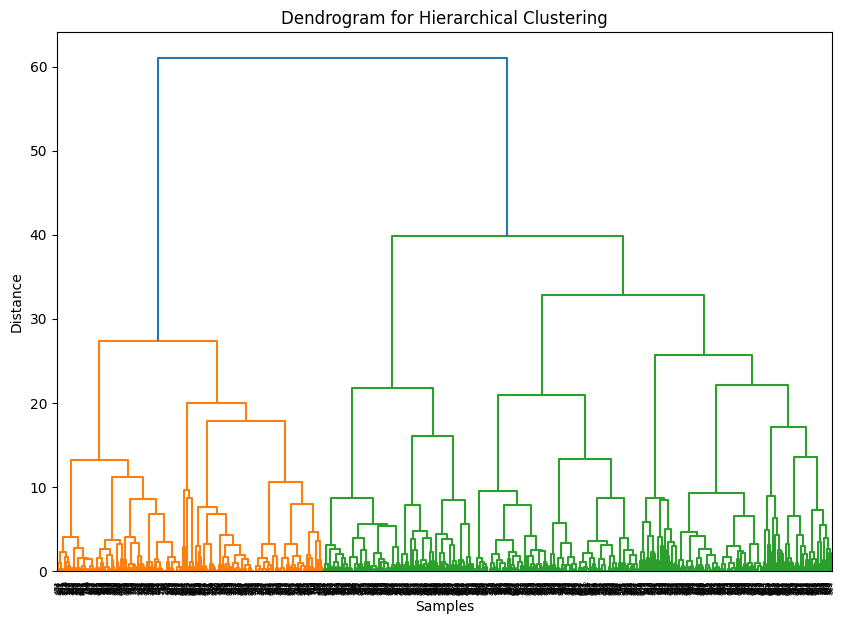

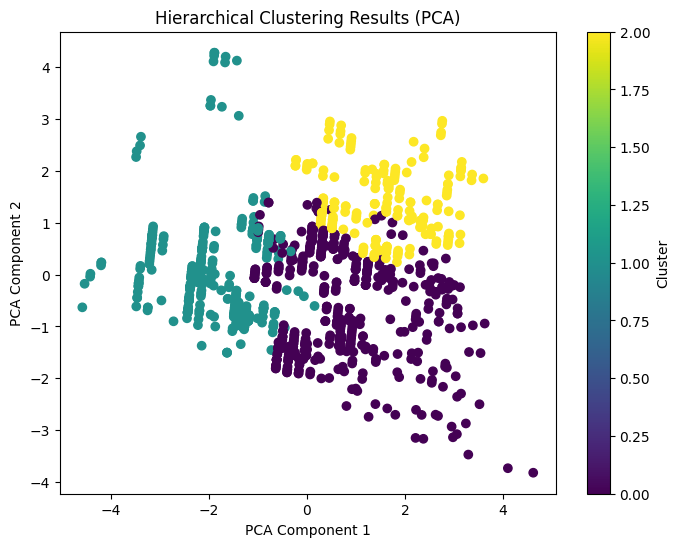

hierarchical_cluster
0    459
1    344
2    197
Name: count, dtype: int64


In [89]:

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model
features['hierarchical_cluster'] = agglomerative_clustering.fit_predict(scaled_features)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['hierarchical_cluster'], cmap='viridis')
plt.title("Hierarchical Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Display the number of points in each cluster
print(features['hierarchical_cluster'].value_counts())



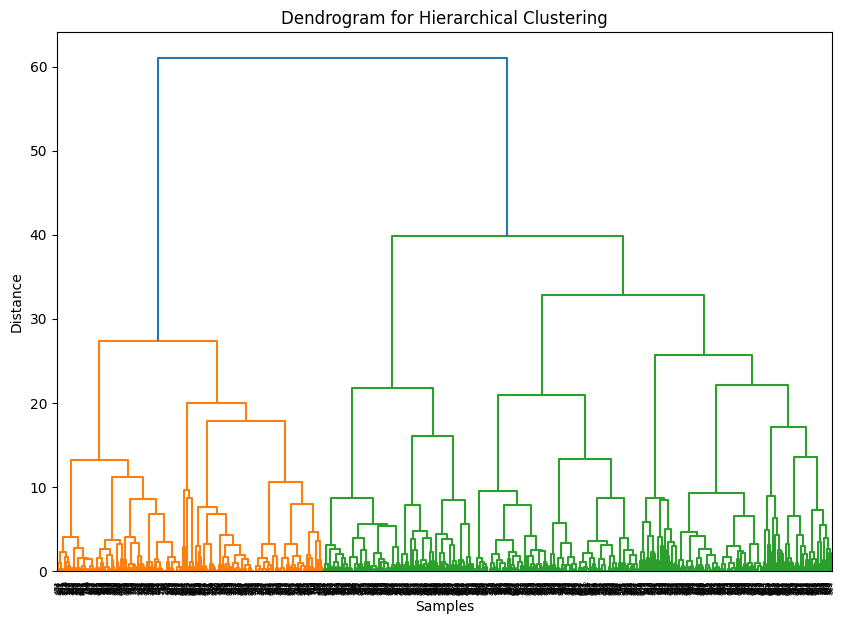

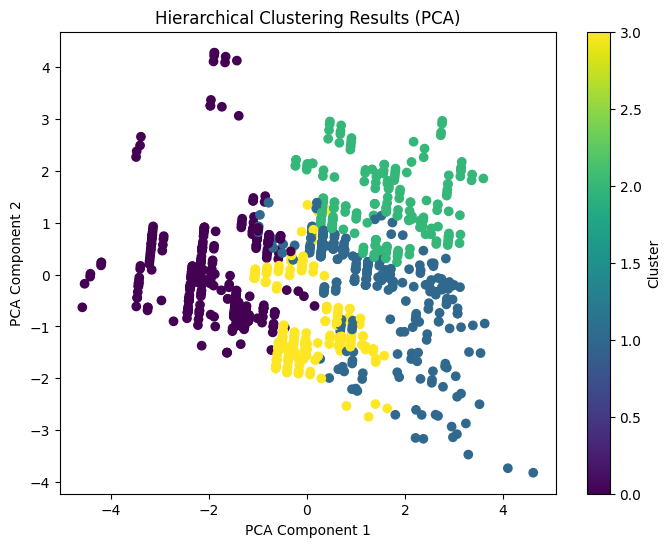

hierarchical_cluster
0    344
1    248
3    211
2    197
Name: count, dtype: int64


In [93]:

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model
features['hierarchical_cluster'] = agglomerative_clustering.fit_predict(scaled_features)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['hierarchical_cluster'], cmap='viridis')
plt.title("Hierarchical Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Display the number of points in each cluster
print(features['hierarchical_cluster'].value_counts())

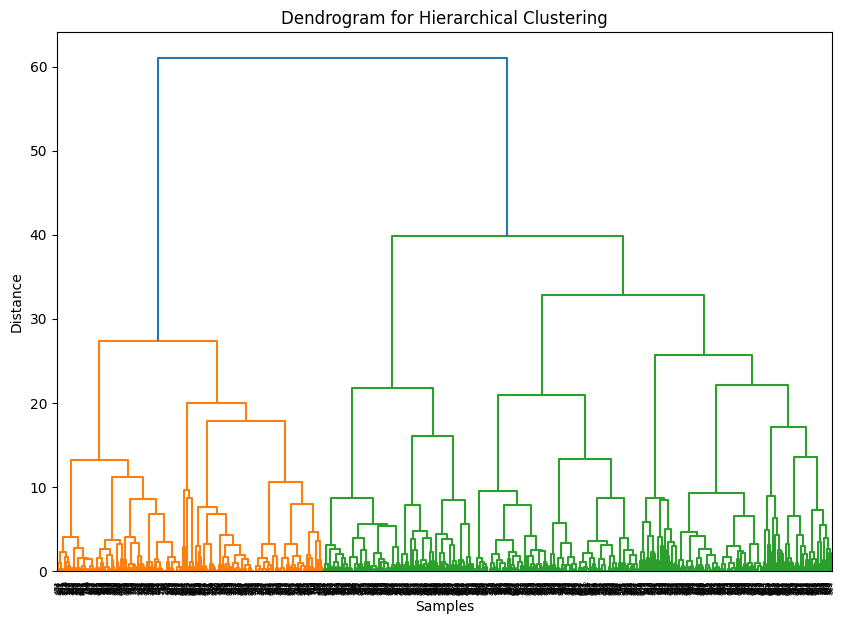

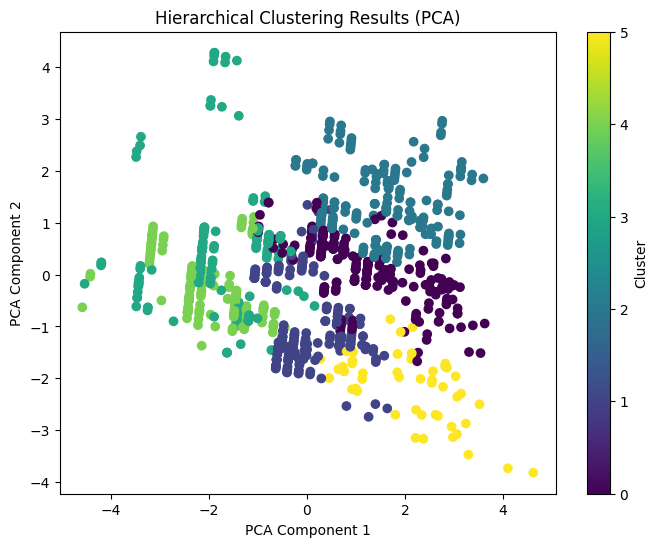

hierarchical_cluster
1    211
0    200
2    197
3    182
4    162
5     48
Name: count, dtype: int64


In [95]:

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')

# Fit the model
features['hierarchical_cluster'] = agglomerative_clustering.fit_predict(scaled_features)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['hierarchical_cluster'], cmap='viridis')
plt.title("Hierarchical Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Display the number of points in each cluster
print(features['hierarchical_cluster'].value_counts())

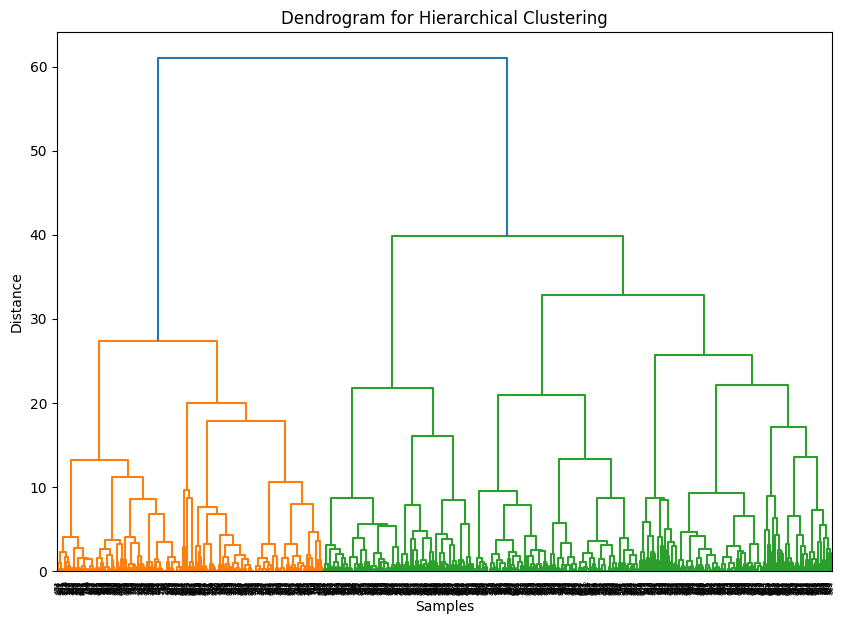

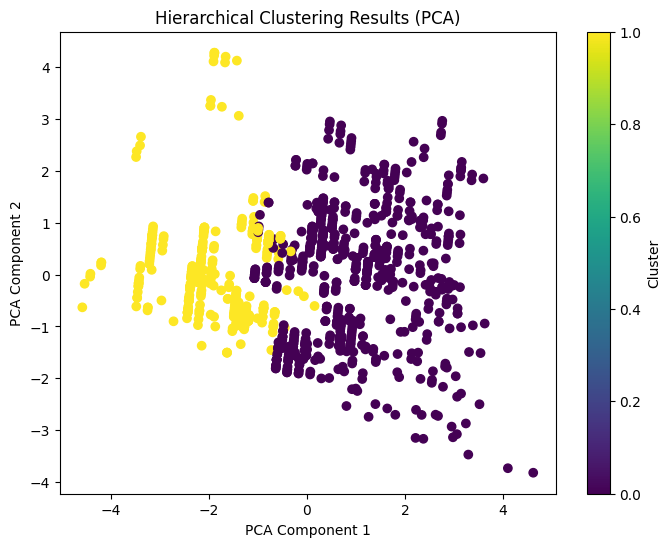

hierarchical_cluster
0    656
1    344
Name: count, dtype: int64


In [97]:

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Fit the model
features['hierarchical_cluster'] = agglomerative_clustering.fit_predict(scaled_features)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['hierarchical_cluster'], cmap='viridis')
plt.title("Hierarchical Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Display the number of points in each cluster
print(features['hierarchical_cluster'].value_counts())

Segment Analysis Based on Customer Behavior
In this analysis, we used three different clustering models to segment customers based on their behavior. The goal was to identify customer segments that could be targeted with coupons to maximize their loyalty and satisfaction.

1. KMeans Clustering
The KMeans algorithm was used to segment customers into clusters. In this model, we experimented with different values of K (the number of clusters) to find the most meaningful segmentation. KMeans is useful because it groups customers with similar characteristics.

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
We also applied DBSCAN, an unsupervised clustering algorithm that does not require us to specify the number of clusters. DBSCAN identifies clusters based on the density of data points and can also detect "noise" or outliers.

3. Hierarchical Clustering (Agglomerative Clustering)
Finally, we used Hierarchical Clustering, specifically Agglomerative Clustering, which creates a hierarchy of clusters. This method starts with each customer as their own cluster and progressively merges clusters based on their similarity. We experimented with various numbers of clusters.

Example Segment Based on 4 Clusters
After applying these clustering algorithms, we obtained 4 distinct customer segments based on their transaction and branch interaction behaviors.

Cluster 1: High Transaction Count, High Unique Branches
Characteristics: Customers in this cluster have made many transactions and interacted with a large number of unique branches. They show high engagement with both the store and its various locations.
Recommendation: These customers are already loyal and active. To maintain and increase their engagement, we can offer them VIP coupons, exclusive discounts, or loyalty rewards. Such incentives would strengthen their relationship with the store and encourage continued visits and purchases.
Cluster 2: High Transaction Count, Low Unique Branches
Characteristics: Customers in this segment are frequent shoppers but are primarily confined to a few branches. They exhibit high transaction activity but do not explore other branches as much.
Recommendation: These customers can be incentivized to explore more branches. Offering branch-specific discounts or deals for other branches would encourage them to visit new locations and increase their overall engagement with the brand.
Cluster 3: Low Transaction Count, High Unique Branches
Characteristics: Customers in this group have interacted with many branches but have made fewer transactions. They are relatively less committed in terms of purchases but engage with the store at multiple locations.
Recommendation: To boost their transaction frequency, these customers could be targeted with promotions aimed at increasing their spending, such as "Spend More, Save More" deals or buy-one-get-one-free offers. This would encourage them to make more purchases while continuing to engage with various branches.
Cluster 4: Low Transaction Count, Low Unique Branches
Characteristics: These customers are both low in transaction count and branch interaction. They have shown minimal engagement with the store.
Recommendation: To re-engage these customers, we could offer welcome-back coupons or re-engagement discounts. These incentives would help entice them back into the store and encourage them to make their first few transactions.